
FC Review for FES Data 
============================================
### Group (6 subgroups)

In [1]:
import os
import numpy as np
import pandas as pd
import random
from datetime import datetime
from nilearn import datasets

# Using the NiftiLabelsMasker
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from brainconn import degree, centrality, clustering, core, distance, modularity, utils
from nilearn import plotting 
from matplotlib.colors import ListedColormap
# !pip install git+https://github.com/FIU-Neuro/brainconn#egg=brainconn

#%% shaded ERROR BAR
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.stats.multitest as smm
import seaborn as sns
import string  

import scipy.io as sio 
from scipy.io import savemat
# pip install teneto
# https://teneto.readthedocs.io/en/latest/tutorial.html
# https://teneto.readthedocs.io/en/latest/tutorial/networkmeasures.html
from teneto import communitymeasures
from nilearn import datasets

from matplotlib.patches import Rectangle
import mne
import mne.viz
# from mne.viz import plot_connectivity_circle
# import plot_connectivity_circle
from mne_connectivity.viz import plot_connectivity_circle

from joblib import Parallel, delayed
# import nibabel as nib
# from surfer import Brain
# from mayavi import mlab
# from netneurotools import stats as nnstats
# from netneurotools import datasets

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


Atlas ROIs are located in nifti image (4D) at: /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz


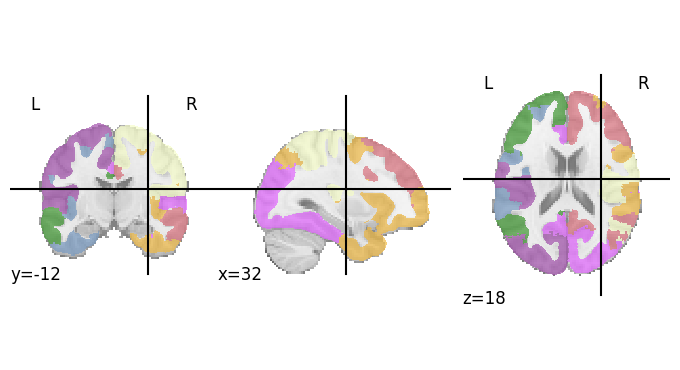

In [2]:
start_time = datetime.now()

# Automatic atlas fetching
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')

save_fig_to = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis'

atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=1)
atlas.region_coords = [(-24,-53,-9), (-26,-77,-14),(-45,-69,-8), (-10,-67,-4), (-27,-95,-12), (-14,-44,-3), (-5,-93,-4), (-47,-70,10), (-23,-97,6), (-11,-70,7), (-40,-85,11), (-12,-73,22), (-7,-87,28), (-23,-87,23), (-51,-4,-2), (-53,-24,9), (-37,-21,16), (-55,-4,10), (-53,-22,18), (-56,-8,31), (-47,-9,46), (-7,-12,46), (-49,-28,57), (-40,-25,57), (-31,-46,63), (-32,-22,64), (-26,-38,68),(-20,-11,68), (-5,-29,67), (-19,-31,68), (-43,-48,-19), (-57,-60,-1), (-26,-70,38), (-54,-27,42), (-41,-35,47), (-33,-49,47),  (-17,-73,54),(-29,-60,59), (-6,-60,57), (-17,-53,68), (-31,-4,53), (-22,6,62), (-48,6,29), (-56,-40,20), (-61,-26,28), (-60,-39,36), (-39,-4,-4), (-33,20,5), (-39,1,11), (-51,9,11), (-28,43,31), (-6,9,41), (-11,-35,46), (-6,-3,65), (-24,22,-20), (-10,35,-21), (-29,-6,-39), (-45,-20,-30), (-28,10,-34), (-43,8,-19), (-53,-51,46), (-35,-62,48), (-45,-42,46), (-61,-43,-13), (-32,42,-13), (-42,49,-6), (-28,58,8), (-42,40,16), (-44,20,27), (-43,6,43), (-9,-73,38), (-5,-29,28), (-3,4,30), (-47,8,-33), (-60,-19,-22), (-56,-6,-12), (-58,-30,-4), (-58,-43,7), (-48,-57,18), (-39,-80,31), (-57,-54,28), (-46,-66,38), (-35,20,-13), (-6,36,-10), (-46,31,-7), (-12,63,-6), (-52,22,8), (-6,44,7), (-8,59,21), (-6,30,25), (-11,47,45), (-3,33,43), (-40,19,49), (-24,25,49), (-9,17,63), (-11,-56,13), (-5,-55,27), (-4,-31,36), (-6,-54,42), (-26,-32,-18), (39,-35,-23), (28,-36,-14), (29,-69,-12), (12,-65,-5), (48,-71,-6), (11,-92,-5), (16,-46,-1), (31,-94,-4), (9,-75,9), (22,-60,7), (42,-80,10), (20,-90,22), (11,-74,26), (16,-85,39), (33,-75,32), (51,-15,5), (64,-23,8), (38,-13,15), (44,-27,18), (59,0,10), (56,-11,14), (58,-5,31), (10,-15,41), (51,-22,52), (47,-11,48), (7,-11,51), (40,-24,57), (32,-40,64), (33,-21,65), (29,-34,65), (22,-9,67), (10,-39,69), (6,-23,69), (20,-29,70), (50,-53,-15), (52,-60,9), (59,-16,34), (46,-38,49), (41,-31,46), (15,-73,53), (34,-48,51), (26,-61,58), (8,-56,61), (21,-48,70), (34,-4,52), (26,7,58), (52,11,21), (57,-45,9), (60,-39,17), (60,-26,27), (51,4,40), (41,6,-15), (46,-4,-4),  (36,24,5), (43,7,4), (7,9,41), (11,-36,47), (8,3,66), (12,39,-22), (28,22,-19), (15,64,-8), (30,9,-38), (47,-12,-35), (25,-11,-32), (62,-37,37), (53,-42,48), (37,-63,47), (63,-41,-12), (34,21,-8), (36,46,-13), (29,58,5), (43,45,10), (46,24,26), (30,48,27), (41,33,37), (42,14,49), (14,-70,37), (5,-24,31), (5,3,30), (7,31,28), (7,25,55), (47,-69,27), (54,-50,28), (51,-59,44), (47,13,-30), (61,-13,-21), (55,-6,-10), (63,-27,-6), (52,-31,2), (51,28,0), (5,37,-14), (8,42,4), (6,29,15), (8,58,18), (15,46,44), (29,30,42), (23,24,53), (12,-55,15), (7,-49,31), (6,-58,44)]

# Loading atlas image stored in 'maps'
atlas_filename = atlas.maps
# Loading atlas data stored in 'labels'
labels = atlas.labels
labels = atlas.labels.astype('U') # covert array of bytes to array of strings

# Setting systems' labels
roi = 200
atlas.systems = [None] * roi
atlas.systems[7] = "Visual (LH)"
atlas.systems[22] = "Somatomotor (LH)"
atlas.systems[37] = "Dorsal Attention (LH)"
atlas.systems[49] = "Ventral Attention (LH)"
atlas.systems[57] = "Limbic (LH)"
atlas.systems[67] = "Frontoparietal (LH)"
atlas.systems[87] = "Default (LH)"
atlas.systems[108] = "Visual (RH)"
atlas.systems[125] = "Somatomotor (RH)"
atlas.systems[141] = "Dorsal Attention (RH)"
atlas.systems[153] = "Ventral Attention (RH)"
atlas.systems[161] = "Limbic (RH)"
atlas.systems[173] = "Frontoparietal (RH)"
atlas.systems[191] = "Default (RH)"
systems = atlas.systems

# Define your own list of colors
my_colors = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

# Create a custom colormap
cmap = ListedColormap(my_colors)

# Plot the ROI and save as PDF
fig = plotting.plot_roi(atlas_filename, cmap=cmap)
fig.savefig(save_fig_to + '/fig/yeo7.pdf', dpi = 300)

print('Atlas ROIs are located in nifti image (4D) at: %s' %atlas_filename)  # 4D data

In [3]:
# labels

In [4]:
#%% Load the functional datasets (hc and sci, or sci_c and sci_t) and 
# extract signals (timeseries) on a parcellation defined by labels
# then calculating the correlation and binarized matrices
# ----------------------------------------------------

# masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True,
#                            memory='nilearn_cache', verbose=5)

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

data_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data'

analysis = 'ALL' # 'ALL' subjects or 'SCI' ONLY

# Analysis Grouping		

# PreFES PreNFES MidFES MidNFES PostFES PostNFES

# PreFES	vs	MidFES
# MidFES	vs	PostFES
# PreFES	vs	PostFES
		
# PreNFES	vs	MidNFES
# MidNFES	vs	PostNFES
# PreNFES	vs	PostNFES
		
# PreFES	vs	PreNFES
# MidFES	vs	MidNFES
# PostFES	vs	PostNFES

# Initial Exp
# PreFES	vs	PreNFES 
# PreFES	vs	PostFES

if analysis == "ALL":
    group = ['pre_fes', 'pre_nfes', 'mid_fes', 'mid_nfes', 'post_fes', 'post_nfes']; 
    group_label = ['Pre FES', 'Pre Non-FES', 'Post FES']
#     group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']

elif analysis == "Group":
    group = ['fes', 'nfes']; group_label = ['FES', 'Non-FES']

corr_measure = ConnectivityMeasure(kind='correlation') # kind{“correlation”, “partial correlation”, “tangent”, “covariance”, “precision”}, optional


### Load data from Group 1

In [5]:
#=============================================================================
ts_g1, ts_g2, ts_g3, ts_g4, ts_g5, ts_g6 = [], [], [], [], [], []

nii_g1 = sorted(os.listdir(data_path+'/'+ group[0]))
nii_g1 = [x for x in nii_g1 if x.startswith('errts')] # remove not-nifti elements
nii_g2 = sorted(os.listdir(data_path+'/'+ group[1]))
nii_g2 = [x for x in nii_g2 if x.startswith('errts')] # remove not-nifti elements
nii_g3 = sorted(os.listdir(data_path+'/'+ group[2]))
nii_g3 = [x for x in nii_g3 if x.startswith('errts')] # remove not-nifti elements
nii_g4 = sorted(os.listdir(data_path+'/'+ group[3]))
nii_g4 = [x for x in nii_g4 if x.startswith('errts')] # remove not-nifti elements
nii_g5 = sorted(os.listdir(data_path+'/'+ group[4]))
nii_g5 = [x for x in nii_g5 if x.startswith('errts')] # remove not-nifti elements
nii_g6 = sorted(os.listdir(data_path+'/'+ group[5]))
nii_g6 = [x for x in nii_g6 if x.startswith('errts')] # remove not-nifti elements


# reading the nifti files
for nii in nii_g1: # 1st session PreFES
    ts_g1.append(masker.fit_transform(data_path + '/'+ group[0] + '/'+ nii)) # ts_g = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_FES dataset: '+'{}\n'.format(nii))
for nii in nii_g2: # 1st session Pre_NFES
    ts_g2.append(masker.fit_transform(data_path + '/'+ group[1] + '/'+ nii)) # ts_g2 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Pre_NFES dataset:'+'{}\n'.format(nii))
for nii in nii_g3: # 2nd session Mid_FES
    ts_g3.append(masker.fit_transform(data_path + '/'+ group[2] + '/'+ nii)) # ts_g3 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g4: # 2nd session Mid_FES
    ts_g4.append(masker.fit_transform(data_path + '/'+ group[3] + '/'+ nii)) # ts_g4 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Mid_NFES dataset: '+'{}\n'.format(nii))
for nii in nii_g5: # 3rd session Post_FES
    ts_g5.append(masker.fit_transform(data_path + '/'+ group[4] + '/'+ nii)) # ts_g5 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_FES dataset:'+'{}\n'.format(nii))
for nii in nii_g6: # 3rd session Post_NFES
    ts_g6.append(masker.fit_transform(data_path + '/'+ group[5] + '/'+ nii)) # ts_g6 = masker.fit_transform(fmri_filenames, confounds=data.confounds)
    print('Loading from Post_NFES dataset:'+'{}\n'.format(nii))
    
# saving numpy arrays (timeseries)
# /Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0], ts_g1) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1], ts_g2)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2], ts_g3) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3], ts_g4) 
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4], ts_g5)   
np.save('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5], ts_g6)

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]1.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_FES dataset: errts.scifes03a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]2.1s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cac

[Memory]21.1s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes09a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]22.0s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes11a.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]22.8s, 0.4min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Pre_NFES dataset:errts.scifes11a.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_

[Memory]41.9s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_NFES dataset: errts.scifes09b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]42.8s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_NFES dataset: errts.scifes09b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]43.7s, 0.7min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Mid_NFES dataset: errts.scifes11b.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilea

[Memory]62.9s, 1.0min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes01b.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]63.8s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes05c.r01.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilearn_data/schaefer_2018/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[Memory]64.6s, 1.1min   : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
Loading from Post_NFES dataset:errts.scifes05c.r02.fanaticor+tlrc.nii.gz

[NiftiLabelsMasker.wrapped] loading data from /Users/ismaila/nilea

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

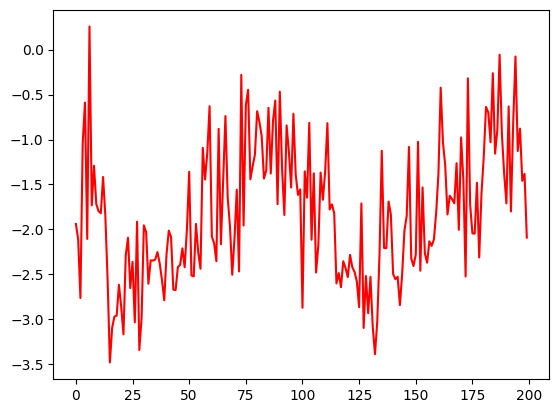

In [6]:
# loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

# calculating correlations
corr_g1 = corr_measure.fit_transform(ts_g1)
corr_g2 = corr_measure.fit_transform(ts_g2)
corr_g3 = corr_measure.fit_transform(ts_g3)
corr_g4 = corr_measure.fit_transform(ts_g4)
corr_g5 = corr_measure.fit_transform(ts_g5)
corr_g6 = corr_measure.fit_transform(ts_g6)
# Save arrays into a MATLAB-style .mat file for modularity

corr_path = '/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/SCI/fc/'

# corr_hc.mat corr_sci.mat
savemat(corr_path + 'corr_'+group[0]+'.mat', {'corr_'+group[0]: corr_g1})
savemat(corr_path + 'corr_'+group[1]+'.mat', {'corr_'+group[1]: corr_g2})
savemat(corr_path + 'corr_'+group[2]+'.mat', {'corr_'+group[2]: corr_g3})
savemat(corr_path + 'corr_'+group[3]+'.mat', {'corr_'+group[3]: corr_g4})
savemat(corr_path + 'corr_'+group[4]+'.mat', {'corr_'+group[4]: corr_g5})
savemat(corr_path + 'corr_'+group[5]+'.mat', {'corr_'+group[5]: corr_g6})

# plot a subject's timeseries
plt.plot(np.arange(0, 200), ts_g1[0][4,:].transpose(), color='red')
plt.show()

#%% Display the mean correlation and binarized matrices

thld = 0.3

# calculate the mean correlation and binary matrices
corr_g1_mean = np.mean(corr_g1, axis=0)
corr_g2_mean = np.mean(corr_g2, axis=0)
corr_g3_mean = np.mean(corr_g3, axis=0)
corr_g4_mean = np.mean(corr_g4, axis=0)
corr_g5_mean = np.mean(corr_g5, axis=0)
corr_g6_mean = np.mean(corr_g6, axis=0)
bin_g1_mean = utils.binarize(utils.threshold_proportional(corr_g1_mean, thld, copy=True))
bin_g2_mean = utils.binarize(utils.threshold_proportional(corr_g2_mean, thld, copy=True))
bin_g3_mean = utils.binarize(utils.threshold_proportional(corr_g3_mean, thld, copy=True))
bin_g4_mean = utils.binarize(utils.threshold_proportional(corr_g4_mean, thld, copy=True))
bin_g5_mean = utils.binarize(utils.threshold_proportional(corr_g5_mean, thld, copy=True))
bin_g6_mean = utils.binarize(utils.threshold_proportional(corr_g6_mean, thld, copy=True))

# general plot settings
split = np.array([-0.5, 13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5, 199.5])
color = ['#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D',
         '#A251AC', '#789AC1', '#409832', '#E165FE', '#F6FDC9', '#EFB944', '#D9717D']

In [100]:
# print(f'corr_g1 shape: {corr_g1.shape} {type(ts_g1)}')
# print(f'corr_g1 shape: {np.min(corr_g1[0])} ; {np.max(corr_g1[0])}') 

corr_g1 shape: (18, 200, 200) <class 'list'>
corr_g1 shape: -0.5145783424377441 ; 1.0


In [7]:
print(f'{analysis} has ==> {len(ts_g1)}-{group[0]} & {len(ts_g2)}-{group[1]} & {len(ts_g3)}-{group[2]} & {len(ts_g4)}-{group[3]} & {len(ts_g5)}-{group[4]} & {len(ts_g6)}-{group[5]}')

ALL has ==> 18-pre_fes & 10-pre_nfes & 14-mid_fes & 10-mid_nfes & 16-post_fes & 10-post_nfes


In [8]:
# PreFES PreNFES PostFES id 0|1; 1|2; 4|5
# 3 6 7 5 7 4
# 3	PreFES	vs	PostFES
# 7	PreFES	vs	PreNFES

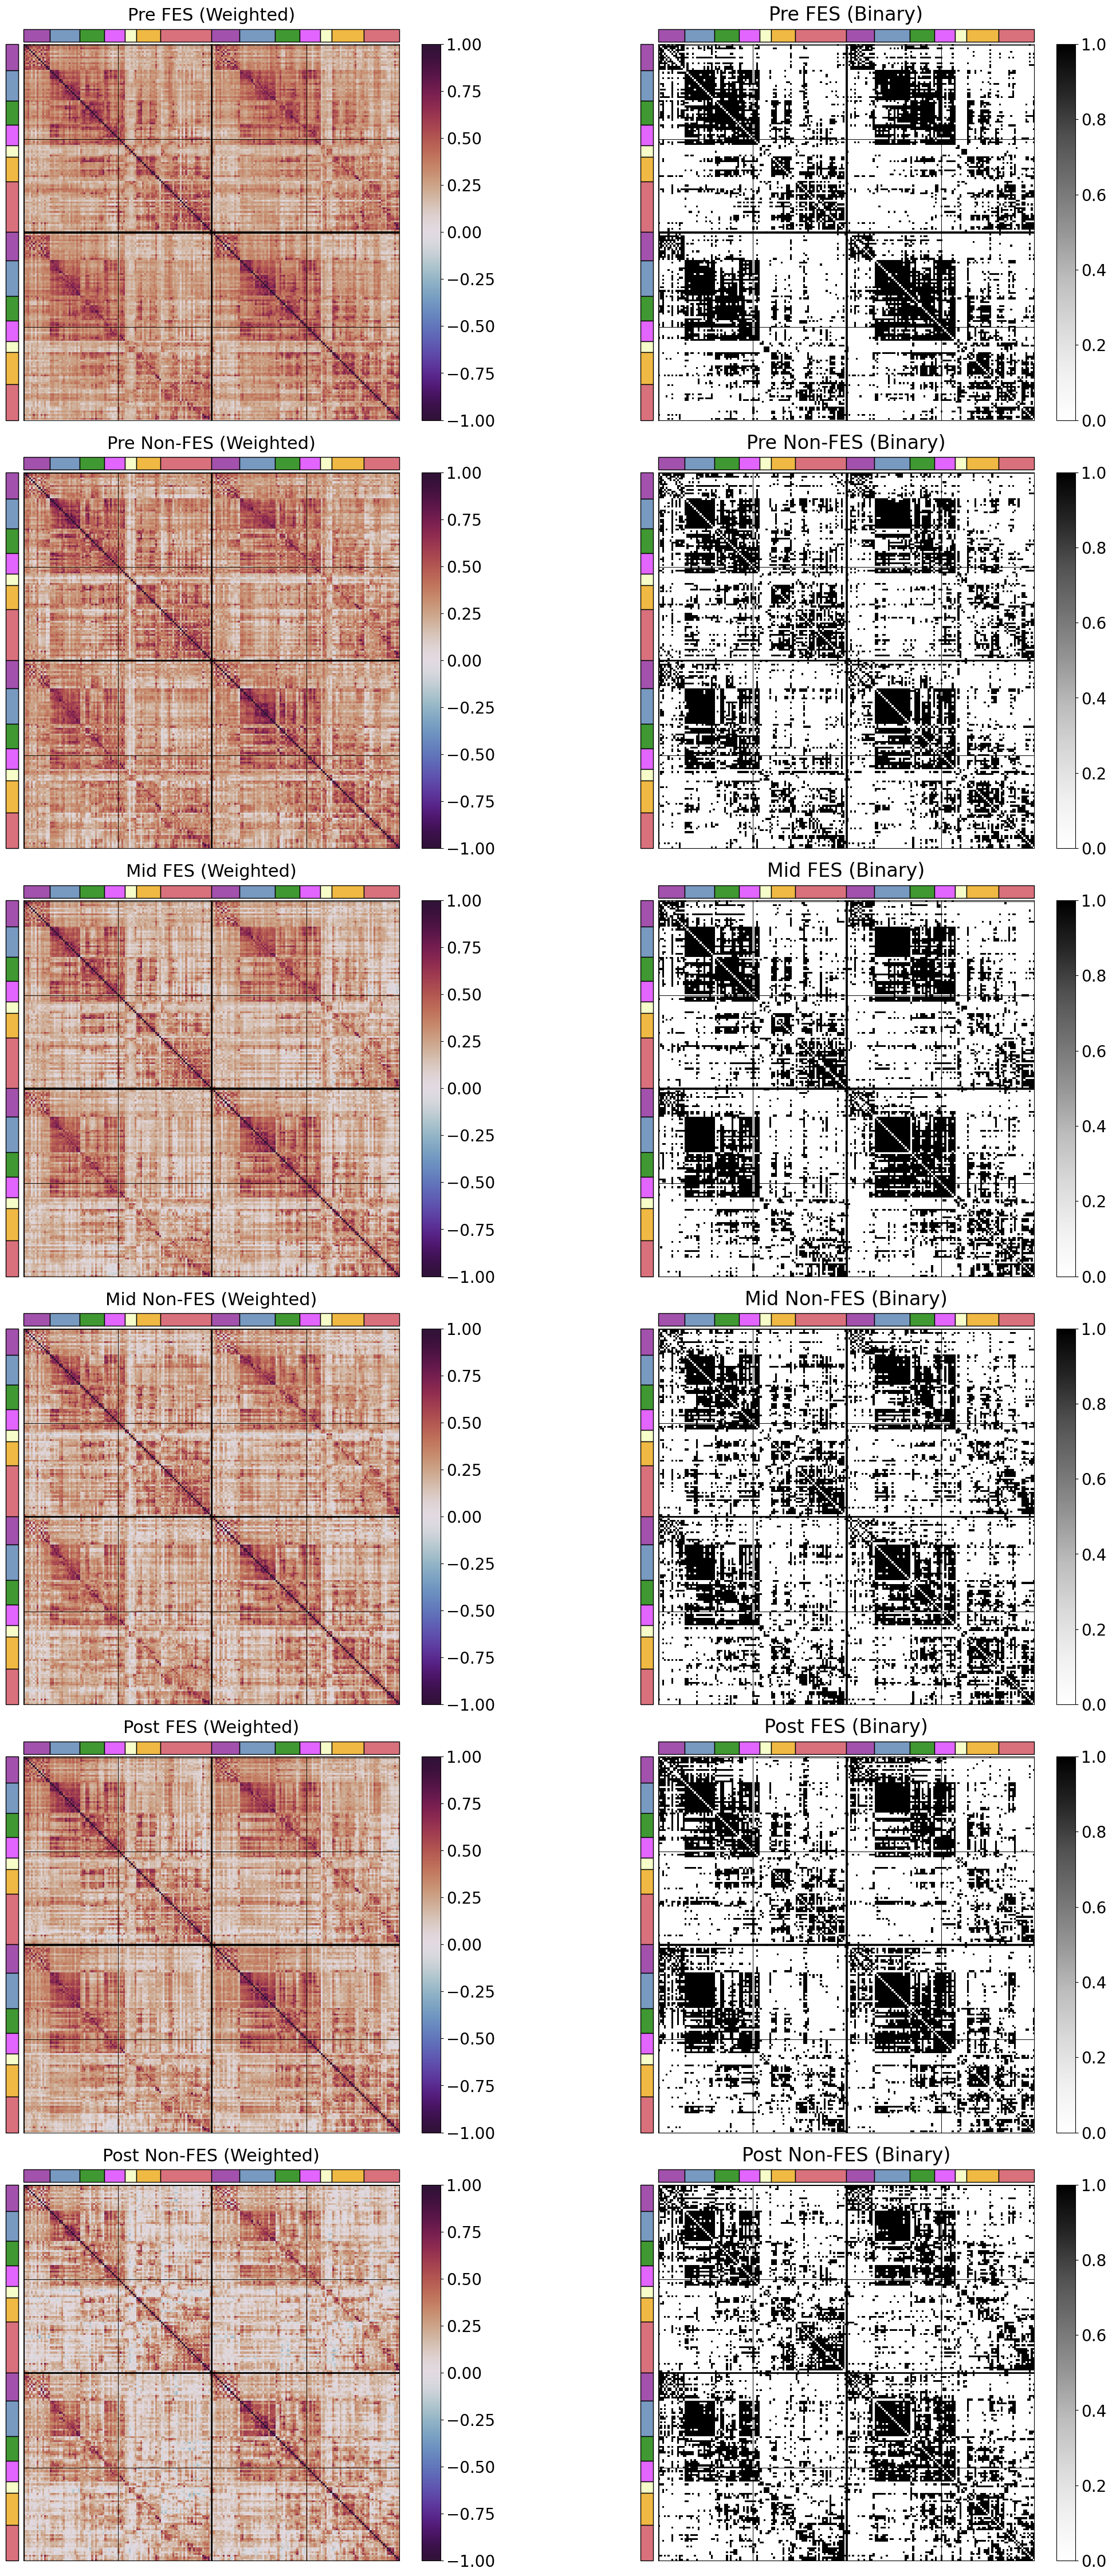

In [8]:
import matplotlib.patches as patches

# Define the number of rows and columns
nrows = 6
ncols = 2

# Create a 2-column by 6-row subplot figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 45))

# Assuming these are predefined matrices
data_matrices_weighted = [corr_g1_mean, corr_g2_mean, corr_g3_mean, corr_g4_mean, corr_g5_mean, corr_g6_mean]
data_matrices_binarized = [bin_g1_mean, bin_g2_mean, bin_g3_mean, bin_g4_mean, bin_g5_mean, bin_g6_mean]
group_label = ['Pre FES', 'Pre Non-FES', 'Mid FES','Mid Non-FES', 'Post FES', 'Post Non-FES']
# Loop over the rows and columns
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        
        if j == 0:  # Left column, weighted correlations
            ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='twilight_shifted')
            ax.set_title(f'{group_label[i]} (Weighted)', fontsize=22, y=1.04)

            # Customize ticks for weighted matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_weighted[i], vmin=-1, vmax=1, cmap='twilight_shifted'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        else:  # Right column, binarized correlations
            ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys')
            ax.set_title(f'{group_label[i]} (Binary)', fontsize=24, y=1.04)

            # Customize ticks for binarized matrix
            ax.set_xticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])
            ax.set_yticks([13.5, 29.5, 42.5, 53.5, 59.5, 72.5, 99.5, 114.5, 133.5, 146.5, 157.5, 163.5, 180.5])

            # Add colorbar
            cb = plt.colorbar(ax.matshow(data_matrices_binarized[i], vmin=0, vmax=1, cmap='Greys'), ax=ax, fraction=0.03, pad=0.03)
            cb.ax.tick_params(labelsize=20)

        # Draw grid lines
        ax.axvline(x=100-0.5, color='k', linewidth=2)
        ax.axhline(y=100-0.5, color='k', linewidth=2)
        ax.grid(color='black', linestyle='-', linewidth=0.7)

        # Disable ticks and labels
        ax.tick_params(
            axis='both',       # changes apply to the x,y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False, top=False, left=False, right=False, labeltop=False, labelleft=False)  # ticks and labels along the edge are off

        # Add rectangle objects as tick labels (X axis)
        xmin, xmax, ymin, ymax = ax.axis()
        xy = split[:-1]  # anchor points
        h = (ymax - ymin) / 30
        space = h / 5
        intercept = ymax + space  # intercept
        w = split[1:] - xy  # rectangle width(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((xy[k], intercept), width=w[k], height=h, facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

        # Add rectangle objects as tick labels (Y axis)
        width = (ymax - ymin) / 30
        h = split[1:] - xy  # rectangle height(s)
        for k in range(len(xy)):  # plot rectangles one-by-one
            ax.add_patch(patches.Rectangle((intercept + space, xy[k]), width=width, height=h[k], facecolor=color[k], clip_on=False, linewidth=1, edgecolor='k'))

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the entire figure with subplots
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_weighted_bin.png',
            bbox_inches='tight', pad_inches=0, format='png', dpi=300)
plt.savefig('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/fig/subplots_1-6_corr_bin.pdf',
            bbox_inches='tight', pad_inches=0, format='pdf', dpi=300)

# Show the plot
plt.show()


In [9]:
# print(f'FC subject: type n shape {type(corr_g1)} {corr_g1.shape}')
# print(f'FC Group: type n shape {type(corr_g1_mean)} {corr_g1_mean.shape}')


FC subject: type n shape <class 'numpy.ndarray'> (18, 200, 200)
FC Group: type n shape <class 'numpy.ndarray'> (200, 200)


In [ ]:
# # FC of SMN Only
# corr_g1, corr_g2, corr_g3,  corr_g4,  corr_g5,  corr_g6
# Pre FES',    'Pre Non-FES', 'Mid FES',     'Mid Non-FES', 'Post FES',    'Post Non-FES


In [166]:
# # Generate simulated time-series data with varying correlations
# n_TRs = 200  # Number of time points
# n_regions = 200  # Number of brain regions

# # Create a base signal
# base_signal = np.random.rand(n_TRs, 1)

# # Generate time-series with different correlations
# time_series_rnd = np.hstack([
#     base_signal * np.random.uniform(-1, 1) + np.random.rand(n_TRs, 1) * (1 - abs(np.random.uniform(-1, 1)))
#     for _ in range(n_regions)
# ])

# ComputeFCMatrix(corr_g1[0]) # corr_g1_mean time_series corr_g1[0] time_series_rnd

In [62]:
# process_ndarray(corr_g1, 18) # group data in runs

In [ ]:

# SMN FC subj16, (8, 35, 35)
# Means:  [0.9237691  1.0343933  0.909375   0.98732173 0.8449724 ]
# Stds:  [0.5229956  0.44422916 0.48562974 0.34777856 0.5242587 ]

In [159]:
### Check for FC values

import numpy as np
import matplotlib.pyplot as plt
from nilearn.connectome import ConnectivityMeasure

#Compute the connectivity matrix
corr_measure = ConnectivityMeasure(kind='correlation')
#loading numpy arrays (timeseries)
ts_g1 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[0] + '.npy', allow_pickle=True))
ts_g2 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[1] + '.npy', allow_pickle=True))
ts_g3 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[2] + '.npy', allow_pickle=True))
ts_g4 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[3] + '.npy', allow_pickle=True))
ts_g5 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[4] + '.npy', allow_pickle=True))
ts_g6 = list(np.load('/Users/ismaila/Documents/C-Codes/SCI_FES_GraphAnalysis/sci_data/fes_data/ts_' + group[5] + '.npy', allow_pickle=True))

#calculating correlations
ts1 = np.array(ts_g1)
ts2 = np.array(ts_g2)
ts3 = np.array(ts_g3)
ts4 = np.array(ts_g4)
ts5 = np.array(ts_g5)
ts6 = np.array(ts_g6)
#print(f'tr_g1: {np.array(ts_g1).shape}')

# Join timeseries of 2 runs into 1 per subject in the group
tsg1_subj = np.array([ts1[i] + ts1[i + 1] for i in range(0, 18, 2)])
tsg2_subj = np.array([ts2[i] + ts2[i + 1] for i in range(0, 10, 2)])
tsg3_subj = np.array([ts3[i] + ts3[i + 1] for i in range(0, 14, 2)])
tsg4_subj = np.array([ts4[i] + ts4[i + 1] for i in range(0, 10, 2)])
tsg5_subj = np.array([ts5[i] + ts5[i + 1] for i in range(0, 16, 2)])
tsg6_subj = np.array([ts6[i] + ts5[i + 1] for i in range(0, 10, 2)])

corr_g1 = corr_measure.fit_transform(tsg1_subj)
corr_g2 = corr_measure.fit_transform(tsg2_subj)
corr_g3 = corr_measure.fit_transform(tsg3_subj)
corr_g4 = corr_measure.fit_transform(tsg4_subj)
corr_g5 = corr_measure.fit_transform(tsg5_subj)
corr_g6 = corr_measure.fit_transform(tsg6_subj)
 
#print(f'corr_g1: {corr_g1.shape} {np.max(corr_g1)}')
 
def fcMatrixReview(conn_matrix):

    # Fisher's r-to-z transform
    conn_matrix_clipped = np.clip(conn_matrix, -0.99999, 0.99999)
    z_matrix = np.arctanh(conn_matrix_clipped)


    # subplot layout
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Plot Pearson Correlation Matrix
    im1 = axes[0].imshow(conn_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[0].set_title('Connectivity Matrix (Pearson Correlation)')
    axes[0].set_xlabel('Brain Regions')
    axes[0].set_ylabel('Brain Regions')
    fig.colorbar(im1, ax=axes[0], label='Connectivity Strength')

    # Create a copy of z_matrix for visualization
    z_matrix_visual = z_matrix.copy()
    np.fill_diagonal(z_matrix_visual, 0)
 
    
    # Plot Fisher r-to-z Transform Matrix
    
    norm = plt.Normalize(vmin=-max(abs(z_matrix_visual.min()), abs(z_matrix_visual.max())), 
                     vmax=max(abs(z_matrix_visual.min()), abs(z_matrix_visual.max())))
    
    im2 = axes[1].imshow(z_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title('Connectivity Matrix (Fisher r-to-z)')
    axes[1].set_xlabel('Brain Regions')
    axes[1].set_ylabel('Brain Regions')
    fig.colorbar(im2, ax=axes[1], label='Z-Score (Fisher Transform)')
    
    # Violin Plot of Z-Scores
    sns.violinplot(data=z_matrix.flatten(), inner='point', color='skyblue', ax=axes[2])
    axes[2].set_title('Distribution of Z-Scores')
    axes[2].set_xlabel('Z-Score Values')
    axes[2].set_ylabel('Density')

    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Display max and min values
    pearson_max_value = np.max(conn_matrix)
    pearson_min_value = np.min(conn_matrix)
    z_max_value = np.max(z_matrix)
    z_min_value = np.min(z_matrix)
    
    print(f"Max val Pearson correlation matrix: {pearson_max_value}")
    print(f"Min val Pearson correlation matrix: {pearson_min_value}")
    print(f"Max val z-score matrix: {z_max_value}")
    print(f"Min val z-score matrix: {z_min_value}")
    print(f"Max val z-score visual matrix: {z_visual_max_value}")
    print(f"Min val z-score visual matrix: {z_visual_min_value}")


def computeFCMatrixSubj(tseries, n):

    #print(f'tseries_subj , {tseries[0].shape}' )
    #print(f'tseries_subj Max: {np.max(tseries[0])}')
    
    fcMatrixReview(tseries[0])
    
    # Slice rows and columns: 15 to 30 and 116 to 134 ==> SMN LH and RH
    rows = np.concatenate((np.arange(15, 31), np.arange(116, 135))) # 15 31 116 135 - 
    cols = np.concatenate((np.arange(15, 31), np.arange(116, 135))) # 15 31 116 135 - 

    # Indexing to extract SMN FC per subject
    smn_fc = tseries[:, rows[:, None], cols]
    # smn_fc = data[rows[:, None], cols]

    # Compute mean and standard deviation for each nx35x35 (SMN) per subject
    fc_means = np.mean(smn_fc, axis=(1, 2))
    fc_stds = np.std(smn_fc, axis=(1, 2))
    
    #print(f"Max : {np.max(smn_fc)} {type(smn_fc)}")
    #print(f"Min : {np.min(smn_fc)}")
    
    print(f'\nSMN FC Subjects, {smn_fc.shape}' )
    print("SMN Mean: ", fc_means)
    print("SMN Std: ", fc_stds)


# computeFCMatrixSubj(corr_g3, 14) 

/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/Users/ismaila/anaconda3/envs/analysis/lib/python3.11/site-packages/nilearn/connectome/connectivity_matrices.py:509: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' inste

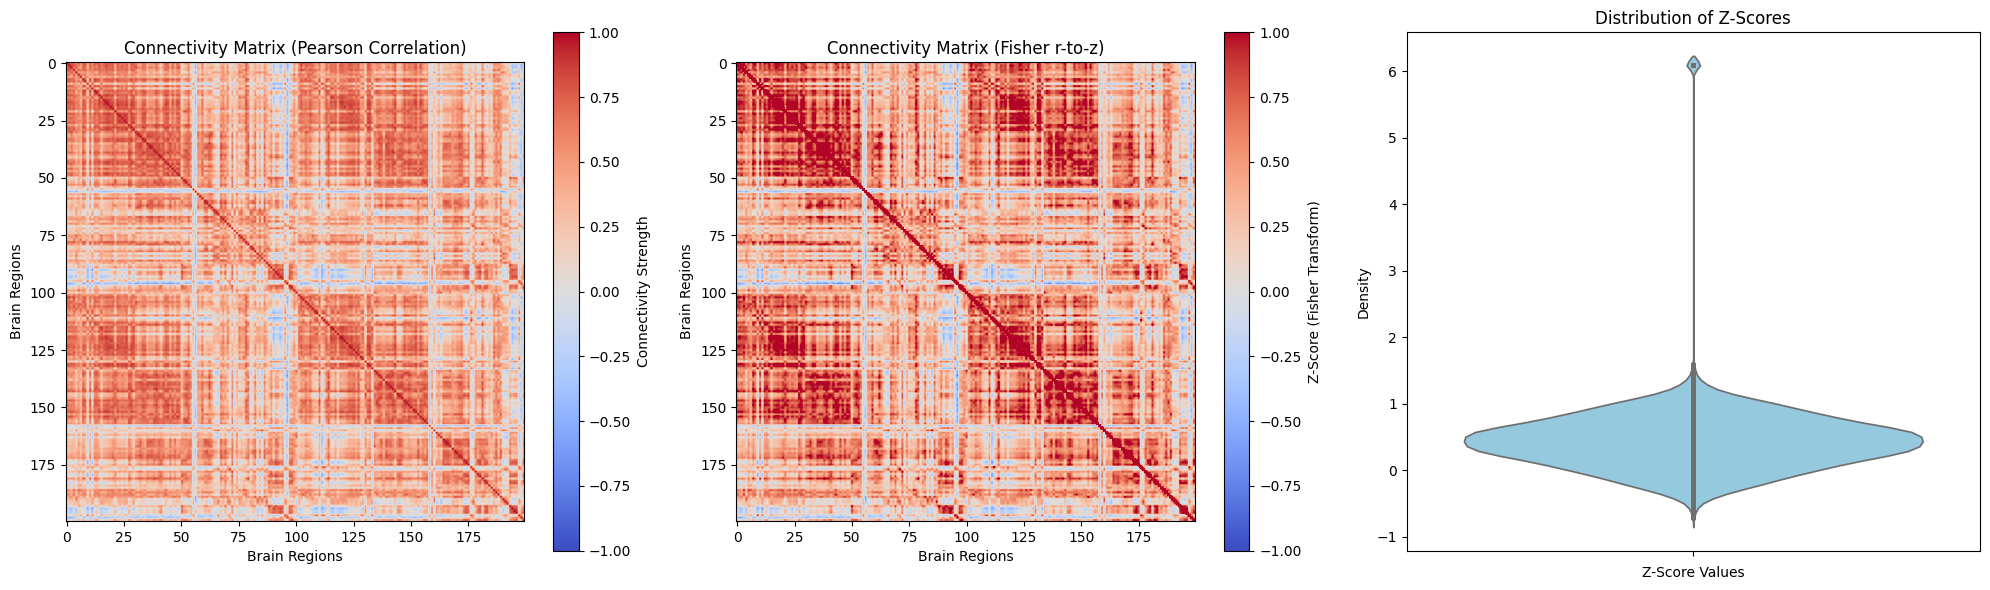

Max val Pearson correlation matrix: 1.0
Min val Pearson correlation matrix: -0.6211249828338623
Max val z-score matrix: 6.102355480194092
Min val z-score matrix: -0.7268345952033997
Max val z-score visual matrix: 2.49619865931468
Min val z-score visual matrix: -2.4957534044299914

SMN FC Subjects, (8, 35, 35)
SMN Mean:  [0.66000533 0.576854   0.44195288 0.70084786 0.34782165 0.4309218
 0.54303575 0.56559914]
SMN Std:  [0.2115754  0.22270547 0.22831549 0.12899707 0.28113723 0.20023037
 0.19674426 0.1984213 ]


In [165]:
computeFCMatrixSubj(corr_g5, 16) # corr_g1_mean time_series corr_g1[0] time_series_rnd